<a href="https://colab.research.google.com/github/Cho-mindong/study_ai_pre-cousre/blob/master/%EA%B5%B0%EC%A7%91.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#군집

1. 군집분석이란?
2. 군집 알고리즘
    1. K-means(k-평균)
    2. 계층군집
    

##1.군집분석이란?

비지도학습으로 분류된다. 따라서 클래스 레이블이 없다. 

시스템 스스로 학습해야 한다. 예를 들어 쇼핑몰 접속자중 훈련세트를 이용해 페이지 체류시간, 구매 금액대같은 특성을 분석해 군집(그룹)을 설정한다. 이를 기반으로 새로운 접속사의 그룹을 설정한다. 그리고 그 그룹의 특성을 분석해 구매했던 제품을 노출시킴으로써 제품 구매율을 높인다. 

즉, 군집은 레이블을 모르는 데이터 안에서 숨겨진 구조를 찾는 것이다.

##2. 군집 알고리즘

###1. k-means

매우 쉬운 구현성과 높은 계산 효율성을 가져 인기가 많다. 산업현장과 학계모두 많이 사용되고 있다.

 k-means알고리즘은 프로토타입 기반 군집애 속한다. 
 프로토타입 기반 군집이란 각 클러스터가 하나의 프로토타입으로 표현된다.

프로토타입은 연속적인 특성에서는 비슷한 데이터 포인트의 센트로이드(centroid-평균)/ 범주형 특성에서는 메도이드(medoid-가장 자주 등장하는 포인트).

k-means 알고리즘은 원형 클러스터를 구분하는데는 뛰어나지만, 몇개의 클러스터를 만들것인지에 대해 직접 지정해줘야 한다는 주관적인 판단이 개입된다. 적절한 k값을 선정해야 한다. 하지만 고차원 데이터를 다루면 k값을 선정하는데 위험이 있다.

k-means 의 특징은?
    
    1. 클러스터가 중첩되지않고 계층적이지 않다. 2. 클러스터당 하나 이상의 데이터가 존재한다.
이러한 특징은 위험을 불러올수 있다.
데이터가 실제 데이터는 꼭 하나의 클러스터로 잘 구분되지는 않기 때문이다.


k-means 이해



In [0]:
from sklearn.datasets import make_blobs

In [0]:
X,y= make_blobs(n_samples=150,        #데이터가150개
                n_features=2,         #2차원
                centers=3,               #3개의 클러스터 혹은 3개의 중심
                cluster_std=0.5,        #클러스터의 표준편차값 0.5
                shuffle=True,          #무작위로 섞는다
                random_state=0)          #seed(0)       

In [0]:
import matplotlib.pyplot as plt


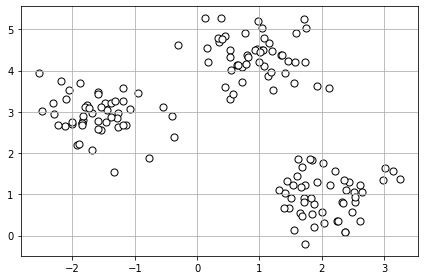

In [0]:
plt.scatter(X[:,0],      #출력값은 2차원 삼전도 
            X[:,1],
            c="white",
            marker="o",
            edgecolor="black",
            s=50)
plt.grid()
plt.tight_layout()
plt.show()

여기서 우리의 목표는 특성의 유사도에 기초하여 데이터들을 그룹으로 모으는 것

k-means 4단계 알고리즘( 핸즈온 머신러닝, p306)

1. 훈련데이터셋 포인트에서 랜덤하게 k개의 센트로이드를 정한다.(그냥 무작위로 k개의 샘플을 뽑아 그 포인터(위치)를 센트로이드라고 정한다)
2. 모든 훈련데이터를 가장 가까운 센트로이드에 할당한다.(센트로이드와 그 센트로이드와 가장 가까운 훈련데이터들이 클러스터를 이룬다.)- 각각의 클러스터는 클러스터에 속한 데이터에게 레이블을 부여한다는 말.
3. 각각의 클러스터 중 데이터들과 유사도를 따져 센트로이드 다시 정한다.
4. 다시 모든 훈련데이터를 가장 가까운 센트로이드에 할당한다.
5. 각각의 클러스터 중 데이터들과 유사도를 따져 센트로이를 다시 정한다.
.
.
.
센트로이드가 변화가 없을 때(클러스터 할당이 변하지 않을 때)까지 또는 사용자가 지정한 허용오차나 최대 반복횟수에 도달할때 까지 이 과정을 계속 반복한다.

그러면 k-means 알고리즘 단계중 센트로이드가 클러스터의 중심데이터들간의 유사도는 어떻게 측정할까? 이 말은 센트로이드를 최적화를 해야한다는 말이다.

    여기서 우리는 데이터들간의 유클리디안 거리 혹은 유클리디안 거리 제곱 지표를 사용해 간단한 최적화 문제로 k-means 알고리즘을 설명할 수있다. 즉, k-means알고리즘은 최적화 문제다. 

[어떻게 최적화를 시키냐?](http://naver.me/59ANbQ3I)

이렇게 센트로이드가 변화할때마다 제곱 오차합을 계산해 허용오차값이 일정 수준내로 들어 온다면 더이상 클러스터가 변화하지 않는다.
그럼 최적화가 완료.

추가적으로 각 점들간의 거리를 측정할때, 점들간의 단위와 변동폭이 크다면 왜곡이 일어날수 있다.
왜곡을 줄이고자 거리 산츨시 불필요한 항목간의 특성을 제거하고 단위를 일치시키는 표준화과정을 진행하면 좋은 결과를 얻을수있다.


그럼 k-means 를 이용해 표현해보자.

In [0]:
from sklearn.cluster import KMeans

In [0]:
km=KMeans(n_clusters=3,   #클러스터 개수 3개
          init="random",   #초기 센트로이드를 무작위로 선정
          n_init=10,     #센트로이드에 대해서 독립적으로 몇번 수행할건지 ,그중 제곱오차합이 가장 낮은 센트로이드 선택
          max_iter=300,  #최대 300번 반복수행
          tol=1e-04,   #허용오차합
          random_state=0)  #seed(0)

In [0]:
y_km=km.fit_predict(X)

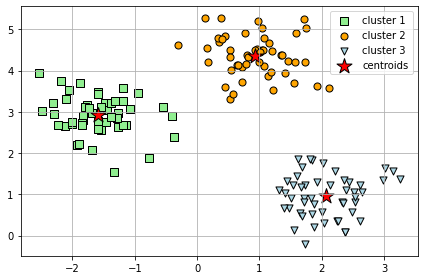

In [0]:
plt.scatter(X[y_km==0,0],      #출력값은 2차원 삼전도 
            X[y_km==0,1],
            c="lightgreen",
            marker="s",
            edgecolor="black",
            label="cluster 1",
            s=50)
plt.scatter(X[y_km==1,0],      #출력값은 2차원 삼전도 
            X[y_km==1,1],
            c="orange",
            marker="o",
            edgecolor="black",
            label="cluster 2",
            s=50)
plt.scatter(X[y_km==2,0],      #출력값은 2차원 삼전도 
            X[y_km==2,1],
            c="lightblue",
            marker="v",
            edgecolor="black",
            label="cluster 3",
            s=50)
plt.scatter(km.cluster_centers_[:,0],      #출력값은 2차원 삼전도 
            km.cluster_centers_[:,1],
            c="red",
            marker="*",
            edgecolor="black",
            label="centroids",
            s=250)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

__이렇게 시각화가 가능한 것은 저차원 데이터 셋이기 때문이다__

하지만 여기서 초기 센트로이드를 이상하게 정하고 데이터가 적으면 클러스터 성능이 떨어진다.

그래서 똑똑하게 초기 센트로이드를 정하는 기법인 k-means++알고리즘

이 알고리즘의 핵심은 초기 센트로이드가 최대한 멀리 떨어지도록 설정한다. 훨씬 일관되고 좋은 결과를 보여준다.

In [0]:
km=KMeans(n_clusters=3,   #클러스터 개수 3개
          init="k-means++",   #초기 센트로이드를 k-means++ 기법으로 최대한 멀리 떨어지게 설정
          n_init=10,     #센트로이드에 대해서 독립적으로 몇번 수행할건지 ,그중 제곱오차합이 가장 낮은 센트로이드 선택
          max_iter=300,  #최대 300번 반복수행
          tol=1e-04,   #허용오차합
          random_state=0)  #seed(0)

In [0]:
y_km=km.fit_predict(X)

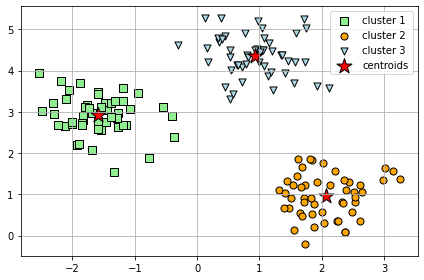

In [0]:
plt.scatter(X[y_km==0,0],      #출력값은 2차원 삼전도 
            X[y_km==0,1],
            c="lightgreen",
            marker="s",
            edgecolor="black",
            label="cluster 1",
            s=50)
plt.scatter(X[y_km==1,0],      #출력값은 2차원 삼전도 
            X[y_km==1,1],
            c="orange",
            marker="o",
            edgecolor="black",
            label="cluster 2",
            s=50)
plt.scatter(X[y_km==2,0],      #출력값은 2차원 삼전도 
            X[y_km==2,1],
            c="lightblue",
            marker="v",
            edgecolor="black",
            label="cluster 3",
            s=50)
plt.scatter(km.cluster_centers_[:,0],      #출력값은 2차원 삼전도 
            km.cluster_centers_[:,1],
            c="red",
            marker="*",
            edgecolor="black",
            label="centroids",
            s=250)
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

#####군집 품질 평가 방법

우리는 지금까지 클래스 레이블이 있어 예측값과 비교를 해 모델이 좋은지 안좋은지 평가 할수 있었다. 군집분석은 클래스 레이블이 없는데 어떻게 평가할수있을까?

    알고리즘 자체의 지표를 사용하고 클러스터 내 오차 제곱합(SSE)지표를 사용해 평가한다.

왜곡값(= 제곱오차합(SSE)) 측정

In [0]:
print("왜곡: %.2f" %km.inertia_)

왜곡: 72.48




1. 엘로우 방법

왜곡이 빠르게 증가하는 지점의 k값을 찾는 것

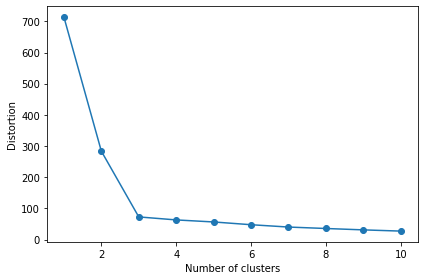

In [0]:
distortions=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,
            init="k-means++",
            n_init=10,
            max_iter=300,
            random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)

plt.plot(range(1,11),distortions,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Distortion")
plt.tight_layout()
plt.show()

k=3 인 지점에서 왜곡이 빠르게 증가한다.

마치 사람의 팔꿈치 형상이다.


2. 실루엣 그래프

클러스터 내 데이터들이 얼마나 조밀하게 모여있는지를 측정하는 그래프 도구. k-means외에도 다른 군집알고리즘에 적용 가능

[실루엣 그래프 계수](https://m.blog.naver.com/samsjang/221017639342?view=img_3)

1. 하나의 임의의 데이터(x)와 동일한 클러스터내의 모든 다른 데이터 포인트 사이의 거리를 평균하여 클러스터 응집력(a)을 계산한다.
2. 앞서 선정한 데이터와 가장 가까운 클러스터의 모든 샘플간 평균거리로 최근접 클러스터의 클러스터 분리력(b)를 계산한다.
3. 클러스터 응집력과 분리력 사이의 차이를 둘 중 큰값으로 나눠 실루엣 계수(s)를 계산한다.

분리력이 응집력보다 크다면 이상적 실루엣 계수 1에 가깝게 된다.
분리력과 응집력이 같다면 클러스터가 중첩되어 있다는 의미다

분리도(분리력,b)는 데이터가 다른 클러스터와 얼마나 다른지를 나타냄.

응집력은 클러스터 내 다른 샘플과 얼마나 비슷한지를 나타낸다. 응집력이 작을수록 클러스터 내 다른 데이터들과 비슷하다는 뜻

클러스터에 따른 실루엣 계수를 보고 싶다면
(핸즈온머신러닝,p313)

###3. 계층 군집

덴드로그램을 그릴수있다. 덴드로그램은 의미 있는 분류 체계를 만들어 준다. 이로인해 군집 결과를 이해하는데 설명하는데 도움이 된다.

미리 클러스터의 개수(k)를 지정하지 않아도 된다.





계층군집을 형성하는 방법

    분할 계층 군집: 전체 데이터를 포함하는 하나의 데이터에서 시작해 클러스터에 있는 데이터가 하나만 남을 때까지 계속 클러스터를 분할해 준다
    병합 계층 군집: 반대로 클러스터당 하나의 데이터에서 시작해  모든데이터가 하나의 클러스터에 속할때까지 가장 가까운 클러스터를 병합해 나간다.

병합계층군집을 이루는 알고리즘에는 

    기본 알고리즘인 단일연결과 완전연결 

    유용하게 쓰이는 알고리즘인 평균연결, 와드 연결이 있다 .

    
1. 단일연결을 사용하면 클러스터 쌍에서 가장 비슷한 즉, 가장 가까운 데이터 간의 거리를 계산한다.
그 다음 거리의 값이 가장 작은 두클러스터를 하나로 합치게 된다

2. 완전연결을 사용하면 클러스터 쌍에서 가장 비슷하지 않은 데이터 즉, 가장 멀리 있는 데이터를 찾아 거리를 구한후 거리의 값이 가장 작은 두 클러스터를 합쳐준다.

3. 평균연결을 사용하면 두 클러스터에 있는 모든 샘플 사이의 평균거리가 가장 작은 클러스터 쌍을 합치는 방식

4. 와드연결을 사용하면 두 클러스터가 합쳐졌을 때의 제곱 오차합이 가장 작게 증가하는 두 클러스터를 합치는 방식이다.

_우리는 그중 병합연결방식 이면서 완전연결을 사용하는 계층군집을 살펴보자_

계층 군집 알고리즘


1. 모든 데이터의 거리행렬을 계산해 계층 분석 알고리즘에 입력한다.

2. 모든 데이터 포인트를 단일 클러스터로 표현한다.
3. 가장 비슷하지 않은 즉, 멀리 떨어진 데이터 간 거리에 기초하여 가장 가까운 두 클러스터를 하나로 합쳐준다.
4. 유사도 행렬 업데이트
5. 하나의 클러스터가 남을 때까지 반복

코딩으로 계층 군집 알고리즘을 알아보자

먼저 군집분석에 필요한 샘플 데이터 생성

In [0]:
import numpy as np
np.random.seed(123)
X=np.random.random_sample([5,3])*10    #array의 사이즈가 [5,3]으로 만들고
                                       #각각의 요소에 0~1까지의 값을 랜덤하게 넣고
                                       #보기 쉽게하기위해 모든 요소에 10을 곱해준다.


In [0]:
import pandas as pd
variables=["X","Y","Z"]  #데이터의 특성
labels=["ID_0","ID_1","ID_2","ID_3","ID_4"] #5개의 데이터 이름
df = pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


거리행렬을 계산하자

In [0]:
from scipy.spatial.distance import pdist, squareform
Y= pdist(df)  #df <-- X,Y,Z # 입력으로 들어온 X,Y,Z값에 대하여 축약된 거리행렬값으로 반환
Y

array([4.973534  , 5.51665266, 5.89988504, 3.83539555, 4.34707339,
       5.10431109, 6.69823298, 7.24426159, 8.31659367, 4.382864  ])

In [0]:
row_dist = pd.DataFrame(squareform(pdist(df,metric="euclidean")),#거리계산은 유클리디안 거리 지표사용
                        columns=labels,index=labels)#squareform: 거리행렬 벡터를 행렬형식으로 변환

그 다음 이 데이터들을 완전연결방식에 적용하기 위해

In [0]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [0]:
row_clusters=linkage(pdist(df,metric="euclidean"),
                     method="complete")

In [0]:
pd.DataFrame(row_clusters,
             columns=["row_label 1","row albel 2", "distance","no. of items in clust."],
             index=["cluster %d" %(i+1) for i in range(row_clusters.shape[0])])

,row_label 1,row albel 2,distance,no. of items in clust.
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


이 표를 덴드로그램으로 나타내자

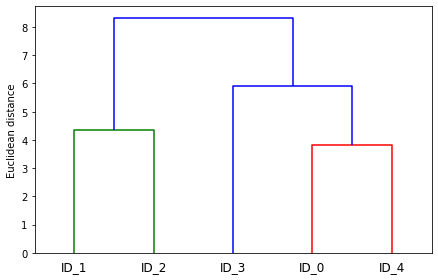

In [0]:
import matplotlib.pyplot as plt

row_dendr= dendrogram(row_clusters, labels=labels)
plt.tight_layout()
plt.ylabel("Euclidean distance")
plt.show()

######__결과표와 덴도르그램 분석__

1. 무작위로 생성한 5개의 데이터는 4개의 클러스터로 분류되었다.

2. row_label 1 , row_label 2 열은 각 클러스터에서 완전 연결방식으로 병합된 클러스터를 나타낸다.

3. distance는 거리를 나타낸다

4. no. of items in clust는 클러스터에 속한 데이터수를 나타낸다

cluster1 의 경우 ID_0 클러스터와 ID_4클러스터와 병합된 클러스터다. 거리는 3.835 다. 속한 데이터수는 2개이다.

cluster3의 경우 ID_3과 ID_5(엥 이런 클러스터가 어디잇어요? ID_0 + ID_4 를 병합한 클러스터를 의미한다.)클러스터가 병합된 클러스터다. 거리는 5.899 . 속한 데이터 수는 3개이다.

이처럼 덴드로그램으로 시각화하면 이해하기가 더 쉽다.

계층 군집 덴드로그램은 주로 히트맵(열+지도)과 함께 자주 사용된다.

히트맵은 이미지 위 혹은 측면에 열분포 형태로 데이터를 효과적으로 표현하는 시각화 기법이다.

같이 사용하게되면 데이터행렬의 개별값을 색으로 표현할수있게 된다. 즉, 각 데이터셋을 효과적으로 요약할수있게 된다.

[덴드로그램+히트맵그림](https://images.app.goo.gl/xRtt8vHzgFGyRut58)

###3. 밀집도 기반 군집(DBSCAN)


원형 클러스터를 가정하지 않는다.

데이터가 조밀하게 모인 지역에 클러스터 레이블을 할당한다

밀집도: 특정 반경(엡실론(ε), epsilon) 안에 있는 샘플의 개수(이웃데이터수,MinPts,min_samples)로 정의.

1. 어떠한 데이터(점)의 특정 반경안에 있는 점들이 우리가 임의로 지정한 개수 이상이면(이때 자기 자신 포함) 이 데이터는 중심점(core point)이 된다. 그리고 그 중심점을 중심으로 클러스터를 형성한다. 중심점(core point)이 서로 다른 중심점의 클러스터의 일부가 서로 되면 그 클러스트들은 서로 연결되어 하나의 클러스터가 된다. 이처럼 클러스터 모양이 원모양이 점점 중첩되어 구름모양처럼 된다.

2. 어떠한 점의 특정 반경안에 있는 점들이 지정한 개수보다 작아도 다른 중심점의 반경안에 있으면 경계점(border point)이 된다.
경계점(border point)은 주로 클러스터 외각에 존재한다.

3. 이렇게 특정반경을 계속만들면 어떠한 반경에도 속하지 않는 모든 점들은        이상치(noise point)가 된다. 

이렇게 모든 데이터는 중심점, 경계점, 이상치로 각 레이블을 할당하게 된다.



장점

클러스터 모양을 원형으로 가정하지 않는다. 모든 데이터들을 꼭 클러스터에 할당하지 않아도 되서 자연스럽게 이상치 데이터들을 구분할 수있게 된다

k-means 와 계층군집분석, 밀집도 기반군집분석 알고리즘을 비교해보자

일단 분석해볼 데이터 생성

In [0]:
from sklearn.datasets import make_moons
X,y=make_moons(n_samples=200,
               noise=0.05,
               random_state=0)

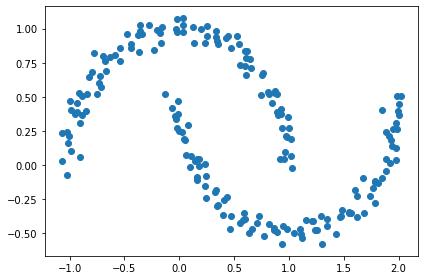

In [0]:
plt.scatter(X[:,0],X[:,1])
plt.tight_layout()
plt.show()

그 결과 k-means 알고리즘과 계층 군집 분석 알고리즘으로는 구분할 수 없다.

그럼 밀집도 기반 군집 알고리즘으로 해보자

In [0]:
from sklearn.cluster import DBSCAN
db= DBSCAN(eps=0.2, min_samples=5, metric="euclidean") #epslion은 0.2, 최소이웃의 수는 5개, 거리측정지표는 유클리디안  
y_db=db.fit_predict(X)                                 

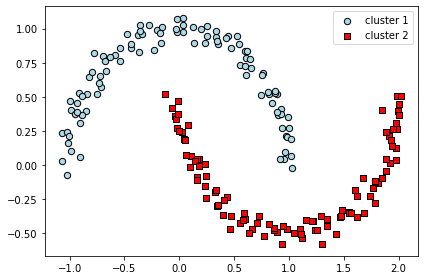

In [0]:
plt.scatter(X[y_db==0, 0], X[y_db==0, 1],
            c="lightblue", marker="o", s=40,
            edgecolor="black",
            label="cluster 1")
plt.scatter(X[y_db==1,0],X[y_db==1,1],
            c="red", marker="s",s=40,
            edgecolor="black",
            label="cluster 2")
plt.legend()
plt.tight_layout()
plt.show()

밀집도 기반 군집 알고리즘으로 성공적으로 구분했다.

이처럼 밀집도기반군집(DBSCAN)은 복잡한 구조를 가진 데이터셋을 구분하는데 좋다

하지만 데이터의 특성이 늘어남에 따라 차원의 저주로 인한 역효과가 증가하게 된다. 물론 차원의 저주는 다른 군집알고리즘에도 영향을 미친다.
이러한 문제를 해결하고자 차원축소나 표준화 등 다양한 방법이 사용되고 있다

밀집도 기반 군집(DBSCAN) 알고리즘은 좋은 결과를 얻기 위해 epslion 과 MinPts (min_samples,중심점이 되기 위한 epsilon 안에 있는 이웃데이터수의 최소값) 두 하이퍼 파라미터를 최적화 시켜줘야 한다.

저차원데이터는 시각화가 돼 하이퍼 파라미터를 정하기 쉽다. 하지만 고차원데이터는 시각화가 안돼 정하기 어렵다

성공적인 군집을 위한 조건
1. 하나의 알고리즘과 일정한 하이퍼 파라미터에 의존하지 마라.
2. 적절한 거리지표선택 예를 들어 유클리디안
3. 실험 환경을 구성하는데 도움을 주는 도메인 지식(유요한 지식)을 갖추는 것
